## Project Proposal: A user-friendly tool to predict the NFL ovr_under_line using just a few key metrics, accomplished using a model analysis.

# Business Understanding

 An estimated 45.2 million Americans plan to wager on the NFL season in some form, up 36% from last year, according to research from the American Gaming Association. At least 

12 billion will be bet on the NFL this season, according to sports betting market tracker PlayUSA.

https://www.cnbc.com/2021/09/09/more-americans-will-wager-on-the-nfl-as-the-league-embraces-betting.html

Utilizing the CRISP-DM process, it is my goal with this project to present to anyone who enjoys gambling on NFL sporting events in Las Vegas this friendly tool to accurately predict a simple yes or no based on a few key metrics. 

Having an easily accessible and user friendly tool for NFL betting and external support would enable the every day betting person roughly estimate the yes or no in over_under Betting.


### The Problem 
A local Las Vegas casino has nobbody betting the over_under line due to the unpredictability we want to try to create a model that can help with the uneasiness of the book keepers odds and increase betters if the model predicts with great precision we can offer the model to clientale and reverse engineer the books to increase profit

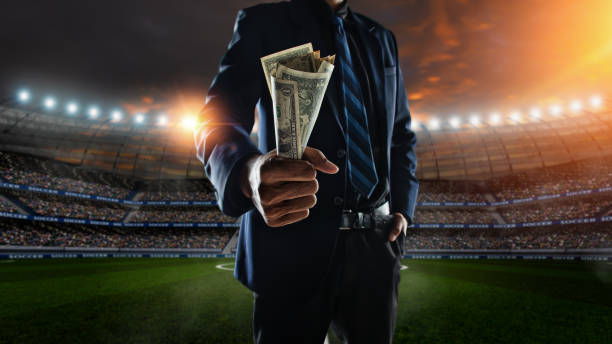

### Data Understanding and Preparation
For this analysis, and the second and third steps of the CRISP-DM process, we will gain a better understanding of our dataset. Being that this is a dataset of Nfl scores, betting odds, and NFL teams data, it will be incredibly useful in the development of a sports betting tool . Utilizing the data resources and preparation it was discovered that The useful information was in more than one data set that would eventually have to be merged or alienated altogether. 

### The Data 

The data comes from a dataset that can be found here:https://www.kaggle.com/tobycrabtree/nfl-scores-and-betting-data

##### Teams
The Data Set Entitled Teams contains columns consisting of 
team_name	-Names of NFL Teams 
team_name_short	-Team Names without the City/State
team_id - Abreviation of NFL Teams
team_id_pfr	-Abreviation of NFL Teams
team_conference	-Conference that the NFL Team is in 
team_division	- Division That the NFL Team is in 
team_conference_pre2002 - Conference Prior to 2002 
team_division_pre2002- Divisions Prior to 2002


##### Stadiums
The Data set entitled Stadiums consists of a bunch of stadium inforatio about where the NFL team plays
I will not be utilizing this data set initailly as I don't believe it plays a huge role in the over_under_target 
stadium_name	
stadium_location	
stadium_open	
stadium_close	
stadium_type	
stadium_address	
stadium_weather_station_code	
stadium_weather_type	
stadium_capacity	
stadium_surface	STATION	NAME	
LATITUDE	
LONGITUDE	
LEVATION

##### Spread 
The Data set entitled Spread will be my priority data set. The Target variabl is located on this data set as well as key informatioin from the previously mentioned data sets are on this data set as well. 
schedule_date	
schedule_season	schedule_week	
schedule_playoff	
team_home	
score_home	
score_away	
team_away	
team_favorite_id	
spread_favorite	
over_under_line	
stadium	stadium_neutral	
weather_temperature	weather_wind_mph	
weather_humidity	
weather_detail


Our project will answer following question: Can we predict whether or not the over or under should be played

Hypothesis: H0 - the home team will be the over

Metrics used To compare models we will focus on 1 major metrics:

F1-Score
 which takes both precision and recall into account to ultimately measure the accuracy of the model. The reason this metric was choosen is because while true negatives are often less import to what ever problem you’re trying to solve especially in a business setting. The F1 score tries to take this into account, giving more weight to false negatives and false positives while not letting large numbers of true negatives influence your score. 
 
 great article going into the metrics found here: https://towardsdatascience.com/whats-the-deal-with-accuracy-precision-recall-and-f1-f5d8b4db1021
 
 
 from sklearn.metrics import classification_report

In [192]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import datetime
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=DeprecationWarning)
    import sklearn

# required machine learning packages
from sklearn import model_selection
from sklearn.feature_selection import RFE
from sklearn.metrics import brier_score_loss, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.calibration import CalibratedClassifierCV as CCV

from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.formula.api import glm
from statsmodels.genmod.families import Poisson
from statsmodels.api import OLS
from sklearn.metrics import classification_report

In [2]:
spread = pd.read_csv('data/spreadspoke_scores.csv')
spread

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,9/2/1966,1966,1,False,Miami Dolphins,14.0,23.0,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71.0,NaN
1,9/3/1966,1966,1,False,Houston Oilers,45.0,7.0,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70.0,NaN
2,9/4/1966,1966,1,False,San Diego Chargers,27.0,7.0,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82.0,NaN
3,9/9/1966,1966,2,False,Miami Dolphins,14.0,19.0,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78.0,NaN
4,9/10/1966,1966,1,False,Green Bay Packers,24.0,3.0,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13227,1/23/2022,2021,Division,True,Kansas City Chiefs,42.0,36.0,Buffalo Bills,KC,-2.5,54.0,Arrowhead Stadium,False,35.0,6.0,54.0,NaN
13228,1/23/2022,2021,Division,True,Tampa Bay Buccaneers,27.0,30.0,Los Angeles Rams,TB,-3.0,48.0,Raymond James Stadium,False,50.0,11.0,69.0,NaN
13229,1/30/2022,2021,Conference,True,Kansas City Chiefs,24.0,27.0,Cincinnati Bengals,KC,-7.0,54.5,Arrowhead Stadium,False,41.0,4.0,41.0,NaN
13230,1/30/2022,2021,Conference,True,Los Angeles Rams,20.0,17.0,San Francisco 49ers,LAR,-3.5,46.0,SoFi Stadium,False,72.0,0.0,NaN,DOME


In [3]:
stadiums = pd.read_csv('data/nfl_stadiums.csv')
stadiums

,stadium_name,stadium_location,stadium_open,stadium_close,stadium_type,stadium_address,stadium_weather_station_code,stadium_weather_type,stadium_capacity,stadium_surface,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION
0,Alamo Dome,"San Antonio, TX",NaN,NaN,indoor,"100 Montana St, San Antonio, TX 78203",78203,dome,72000,FieldTurf,NaN,NaN,NaN,NaN,NaN
1,Allegiant Stadium,"Paradise, NV",2020.0,NaN,indoor,NaN,NaN,dome,65000,Grass,NaN,NaN,NaN,NaN,NaN
2,Alltel Stadium,"Jacksonville, FL",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alumni Stadium,"Chestnut Hill, MA",NaN,NaN,outdoor,"Perimeter Rd, Chestnut Hill, MA 02467",2467,cold,NaN,Grass,NaN,NaN,NaN,NaN,NaN
4,Anaheim Stadium,"Anaheim, CA",1980.0,1994.0,outdoor,"2000 E Gene Autry Way, Anaheim, CA 92806",92806,warm,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,War Memorial Stadium,"Buffalo, NY",1960.0,1972.0,outdoor,"285 Dodge Street, Buffalo, NY 14208",14208,cold,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,Wembley Stadium,"London, UK",2007.0,NaN,outdoor,"Wembley, London HA9 0WS, United Kingdom","Heathrow, UK",moderate,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,Wrigley Field,"Chicago, IL",1920.0,1970.0,outdoor,"1060 West Addison Street, Chicago, IL 60613",60613,cold,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,Yale Bowl,"New Haven, CT",NaN,NaN,outdoor,"276 Derby Ave, West Haven, CT 06516",6516,cold,NaN,Grass,NaN,NaN,NaN,NaN,NaN


In [4]:
teams = pd.read_csv('data/nfl_teams.csv')
teams

,team_name,team_name_short,team_id,team_id_pfr,team_conference,team_division,team_conference_pre2002,team_division_pre2002
0,Arizona Cardinals,Cardinals,ARI,CRD,NFC,NFC West,NFC,NFC West
1,Phoenix Cardinals,Cardinals,ARI,CRD,NFC,NaN,NFC,NFC East
2,St. Louis Cardinals,Cardinals,ARI,ARI,NFC,NaN,NFC,NFC East
3,Atlanta Falcons,Falcons,ATL,ATL,NFC,NFC South,NFC,NFC West
4,Baltimore Ravens,Ravens,BAL,RAV,AFC,AFC North,AFC,AFC Central
5,Buffalo Bills,Bills,BUF,BUF,AFC,AFC East,AFC,AFC East
6,Carolina Panthers,Panthers,CAR,CAR,NFC,NFC South,NFC,NFC West
7,Chicago Bears,Bears,CHI,CHI,NFC,NFC North,NFC,NFC Central
8,Cincinnati Bengals,Bengals,CIN,CIN,AFC,AFC North,AFC,AFC Central
9,Cleveland Browns,Browns,CLE,CLE,AFC,AFC North,AFC,AFC Central


### Stadiums 

### I need  nothing from this particular CSV to help prdict my over and under variable 

In [5]:
#stadiums.info()

## Spread 
There is a lot of EDA done Prior in which I expain in each cell


 Spread_favorite Target Variable #2
 
 Over_under_line target
 
 Stadium Dropped 
 
Stadium neutal  

All Weather ccolumns will be dropped 

 Schedule_dropped below 2013. completed.

In [6]:
#dropping seasons that are before 2012 as I don't know if I need more than 10 years worth of data to explore a prediciton for an over under line

spread.drop(index = spread[spread['schedule_season'] <= 2012].index, inplace = True)
spread = spread.replace(r'^\s*$', np.nan, regex=True)

spread

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
10809,9/5/2013,2013,1,False,Denver Broncos,49.0,27.0,Baltimore Ravens,DEN,-7.5,49.5,Sports Authority Field at Mile High,False,83.0,7.0,30.0,NaN
10810,9/8/2013,2013,1,False,Buffalo Bills,21.0,23.0,New England Patriots,NE,-10.5,51.5,Ralph Wilson Stadium,False,65.0,6.0,55.0,NaN
10811,9/8/2013,2013,1,False,Carolina Panthers,7.0,12.0,Seattle Seahawks,SEA,-3.5,45,Bank of America Stadium,False,87.0,7.0,48.0,NaN
10812,9/8/2013,2013,1,False,Chicago Bears,24.0,21.0,Cincinnati Bengals,CHI,-3.0,42,Soldier Field,False,77.0,13.0,79.0,NaN
10813,9/8/2013,2013,1,False,Cleveland Browns,10.0,23.0,Miami Dolphins,CLE,-2.5,40.5,FirstEnergy Stadium,False,72.0,16.0,80.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13227,1/23/2022,2021,Division,True,Kansas City Chiefs,42.0,36.0,Buffalo Bills,KC,-2.5,54.0,Arrowhead Stadium,False,35.0,6.0,54.0,NaN
13228,1/23/2022,2021,Division,True,Tampa Bay Buccaneers,27.0,30.0,Los Angeles Rams,TB,-3.0,48.0,Raymond James Stadium,False,50.0,11.0,69.0,NaN
13229,1/30/2022,2021,Conference,True,Kansas City Chiefs,24.0,27.0,Cincinnati Bengals,KC,-7.0,54.5,Arrowhead Stadium,False,41.0,4.0,41.0,NaN
13230,1/30/2022,2021,Conference,True,Los Angeles Rams,20.0,17.0,San Francisco 49ers,LAR,-3.5,46.0,SoFi Stadium,False,72.0,0.0,NaN,DOME


<AxesSubplot:xlabel='schedule_season', ylabel='over_under_line'>

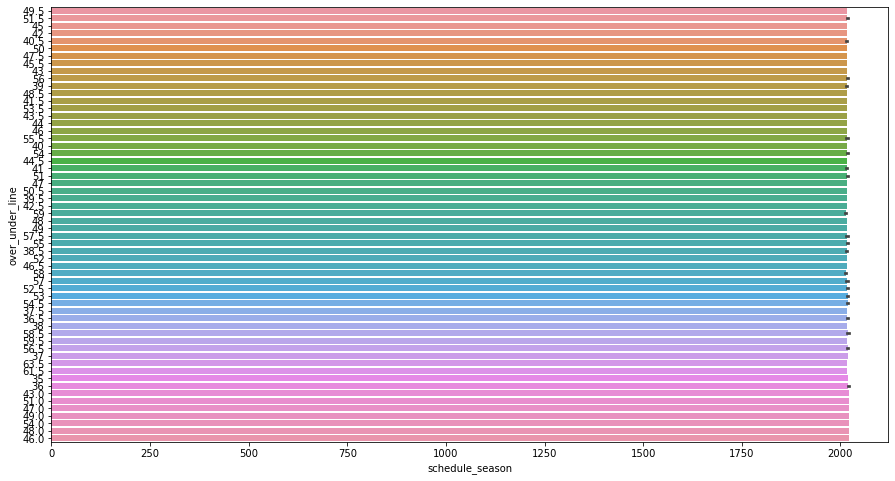

In [7]:
plt.figure(figsize=(15,8))
sns.barplot(x=spread['schedule_season'], y=spread['over_under_line'])

In [8]:
#striping any additional white space in team home
#they will all eventually be away teams so I didn't do that side. 
spread['team_home'].str.strip()

10809          Denver Broncos
10810           Buffalo Bills
10811       Carolina Panthers
10812           Chicago Bears
10813        Cleveland Browns
                 ...         
13227      Kansas City Chiefs
13228    Tampa Bay Buccaneers
13229      Kansas City Chiefs
13230        Los Angeles Rams
13231        Los Angeles Rams
Name: team_home, Length: 2423, dtype: object

In [9]:
spread

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
10809,9/5/2013,2013,1,False,Denver Broncos,49.0,27.0,Baltimore Ravens,DEN,-7.5,49.5,Sports Authority Field at Mile High,False,83.0,7.0,30.0,NaN
10810,9/8/2013,2013,1,False,Buffalo Bills,21.0,23.0,New England Patriots,NE,-10.5,51.5,Ralph Wilson Stadium,False,65.0,6.0,55.0,NaN
10811,9/8/2013,2013,1,False,Carolina Panthers,7.0,12.0,Seattle Seahawks,SEA,-3.5,45,Bank of America Stadium,False,87.0,7.0,48.0,NaN
10812,9/8/2013,2013,1,False,Chicago Bears,24.0,21.0,Cincinnati Bengals,CHI,-3.0,42,Soldier Field,False,77.0,13.0,79.0,NaN
10813,9/8/2013,2013,1,False,Cleveland Browns,10.0,23.0,Miami Dolphins,CLE,-2.5,40.5,FirstEnergy Stadium,False,72.0,16.0,80.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13227,1/23/2022,2021,Division,True,Kansas City Chiefs,42.0,36.0,Buffalo Bills,KC,-2.5,54.0,Arrowhead Stadium,False,35.0,6.0,54.0,NaN
13228,1/23/2022,2021,Division,True,Tampa Bay Buccaneers,27.0,30.0,Los Angeles Rams,TB,-3.0,48.0,Raymond James Stadium,False,50.0,11.0,69.0,NaN
13229,1/30/2022,2021,Conference,True,Kansas City Chiefs,24.0,27.0,Cincinnati Bengals,KC,-7.0,54.5,Arrowhead Stadium,False,41.0,4.0,41.0,NaN
13230,1/30/2022,2021,Conference,True,Los Angeles Rams,20.0,17.0,San Francisco 49ers,LAR,-3.5,46.0,SoFi Stadium,False,72.0,0.0,NaN,DOME


<AxesSubplot:>

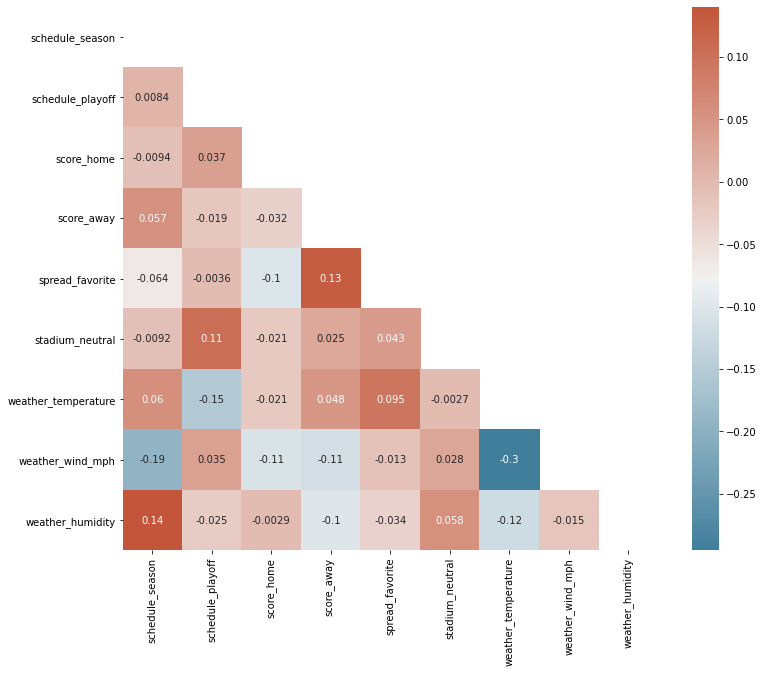

In [10]:
corr = spread.corr()
f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [11]:
#the datatype of the over_under_line was incorrect
spread.reset_index(drop=True, inplace=True)
spread['over_under_line'] = spread.over_under_line.astype(float)


## Teams 

### I will be keeping team_division as divisiional games actually have a significant dilema on spread. 

In [12]:
teams

,team_name,team_name_short,team_id,team_id_pfr,team_conference,team_division,team_conference_pre2002,team_division_pre2002
0,Arizona Cardinals,Cardinals,ARI,CRD,NFC,NFC West,NFC,NFC West
1,Phoenix Cardinals,Cardinals,ARI,CRD,NFC,NaN,NFC,NFC East
2,St. Louis Cardinals,Cardinals,ARI,ARI,NFC,NaN,NFC,NFC East
3,Atlanta Falcons,Falcons,ATL,ATL,NFC,NFC South,NFC,NFC West
4,Baltimore Ravens,Ravens,BAL,RAV,AFC,AFC North,AFC,AFC Central
5,Buffalo Bills,Bills,BUF,BUF,AFC,AFC East,AFC,AFC East
6,Carolina Panthers,Panthers,CAR,CAR,NFC,NFC South,NFC,NFC West
7,Chicago Bears,Bears,CHI,CHI,NFC,NFC North,NFC,NFC Central
8,Cincinnati Bengals,Bengals,CIN,CIN,AFC,AFC North,AFC,AFC Central
9,Cleveland Browns,Browns,CLE,CLE,AFC,AFC North,AFC,AFC Central


In [13]:
teams.drop(columns = ['team_name_short','team_id_pfr','team_conference','team_conference_pre2002','team_division_pre2002'], inplace = True)

In [14]:
#I have to drop the teams who haven't been teams within the last 10 years of the NFL 

teams.drop(index=teams[teams['team_name'] == 'Tennessee Oilerss'].index, inplace = True)
teams.drop(index=teams[teams['team_name'] == 'Houston Oilers'].index, inplace = True)
teams.drop(index=teams[teams['team_name'] == 'Los Angeles Raiders'].index, inplace = True)
teams.drop(index=teams[teams['team_name'] == 'Tennessee Oilers'].index, inplace = True)
teams.drop(index=teams[teams['team_name'] == 'Phoenix Cardinals'].index, inplace = True)
teams.drop(index=teams[teams['team_name'] == 'St. Louis Cardinals'].index, inplace = True)
teams.drop(index=teams[teams['team_name'] == 'Boston Patriots'].index, inplace = True)
teams.drop(index=teams[teams['team_name'] == 'Baltimore Colts'].index, inplace = True)
teams.reset_index(drop=True, inplace=True)
teams['team_name'].str.strip()
teams

,team_name,team_id,team_division
0,Arizona Cardinals,ARI,NFC West
1,Atlanta Falcons,ATL,NFC South
2,Baltimore Ravens,BAL,AFC North
3,Buffalo Bills,BUF,AFC East
4,Carolina Panthers,CAR,NFC South
5,Chicago Bears,CHI,NFC North
6,Cincinnati Bengals,CIN,AFC North
7,Cleveland Browns,CLE,AFC North
8,Dallas Cowboys,DAL,NFC East
9,Denver Broncos,DEN,AFC West


## I want to add individual column of conference to the spread and increase the weight of these games... 

In [15]:
# mapping team_id to the correct teams
spread['team_home'] = spread.team_home.map(teams.set_index('team_name')['team_id'].to_dict())
spread['team_away'] = spread.team_away.map(teams.set_index('team_name')['team_id'].to_dict())

In [16]:
# creating home favorite and away favorite columns (fill na with 0's)
#Instead of one hot encoding or get dummies 
spread.loc[spread.team_favorite_id == spread.team_home, 'home_favorite'] = 1.0
spread.loc[spread.team_favorite_id == spread.team_away, 'away_favorite'] = 1.0
spread.home_favorite.fillna(0.0, inplace=True)
spread.away_favorite.fillna(0.0, inplace=True)

In [17]:
# creating over / under column if the team was over it will get a one and under wil be a 0
#Feature Engineering Instead of one hotEncoding!!!!
spread.loc[((spread.score_home + spread.score_away) > spread.over_under_line), 'over'] = 1
spread.over.fillna(0, inplace=True)


In [18]:
# removing extra columns that aren't necessary for analysis
spread = spread[['schedule_date', 'schedule_season', 'schedule_week', 'team_home',
       'team_away', 'team_favorite_id', 'spread_favorite',
       'over_under_line', 'weather_temperature',
       'weather_wind_mph', 'score_home', 'score_away',
       'stadium_neutral', 'home_favorite', 'away_favorite',
       'over']]

In [19]:
spread

,schedule_date,schedule_season,schedule_week,team_home,team_away,team_favorite_id,spread_favorite,over_under_line,weather_temperature,weather_wind_mph,score_home,score_away,stadium_neutral,home_favorite,away_favorite,over
0,9/5/2013,2013,1,DEN,BAL,DEN,-7.5,49.5,83.0,7.0,49.0,27.0,False,1.0,0.0,1.0
1,9/8/2013,2013,1,BUF,NE,NE,-10.5,51.5,65.0,6.0,21.0,23.0,False,0.0,1.0,0.0
2,9/8/2013,2013,1,CAR,SEA,SEA,-3.5,45.0,87.0,7.0,7.0,12.0,False,0.0,1.0,0.0
3,9/8/2013,2013,1,CHI,CIN,CHI,-3.0,42.0,77.0,13.0,24.0,21.0,False,1.0,0.0,1.0
4,9/8/2013,2013,1,CLE,MIA,CLE,-2.5,40.5,72.0,16.0,10.0,23.0,False,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2418,1/23/2022,2021,Division,KC,BUF,KC,-2.5,54.0,35.0,6.0,42.0,36.0,False,1.0,0.0,1.0
2419,1/23/2022,2021,Division,TB,LAR,TB,-3.0,48.0,50.0,11.0,27.0,30.0,False,1.0,0.0,1.0
2420,1/30/2022,2021,Conference,KC,CIN,KC,-7.0,54.5,41.0,4.0,24.0,27.0,False,1.0,0.0,0.0
2421,1/30/2022,2021,Conference,LAR,SF,LAR,-3.5,46.0,72.0,0.0,20.0,17.0,False,1.0,0.0,0.0


In [20]:
spread['result'] = (spread.score_home > spread.score_away).astype(int)

<ipython-input-20-725b9941b1d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spread['result'] = (spread.score_home > spread.score_away).astype(int)


In [21]:
# some percentages to take into consideration when betting
home_win = "{:.2f}".format((sum((spread.result == 1) & (spread.stadium_neutral == 0)) / len(spread)) * 100)
away_win = "{:.2f}".format((sum((spread.result == 0) & (spread.stadium_neutral == 0)) / len(spread)) * 100)
under_line = "{:.2f}".format((sum((spread.score_home + spread.score_away) < spread.over_under_line.astype(float)) / len(spread)) * 100)
over_line = "{:.2f}".format((sum((spread.score_home + spread.score_away) > spread.over_under_line.astype(float)) / len(spread)) * 100)

favored = "{:.2f}".format((sum(((spread.home_favorite == 1) & (spread.result == 1)) | ((spread.away_favorite == 1) & (spread.result == 0)))
                           / len(spread)) * 100)

cover = "{:.2f}".format((sum(((spread.home_favorite == 1) & ((spread.score_away - spread.score_home) < spread.spread_favorite.astype(float))) | 
                             ((spread.away_favorite == 1) & ((spread.score_home - spread.score_away) < spread.spread_favorite.astype(float)))) 
                         / len(spread)) * 100)

ats = "{:.2f}".format((sum(((spread.home_favorite == 1) & ((spread.score_away - spread.score_home) > spread.spread_favorite.astype(float))) | 
                           ((spread.away_favorite == 1) & ((spread.score_home - spread.score_away) > spread.spread_favorite.astype(float)))) 
                       / len(spread)) * 100)

In [22]:
# print all percentages
print("Number of Games: " + str(len(spread)))
print("Home Straight Up Win Percentage: " + home_win + "%")
print("Away Straight Up Win Percentage: " + away_win + "%")
print("Under Percentage: " + under_line + "%")
print("Over Percentage: " + over_line + "%")
print("Favored Win Percentage: " + favored + "%")
print("Cover The Spread Percentage: " + cover + "%")
print("Against The Spread Percentage: " + ats + "%")

Number of Games: 2423
Home Straight Up Win Percentage: 54.77%
Away Straight Up Win Percentage: 43.66%
Under Percentage: 50.64%
Over Percentage: 47.79%
Favored Win Percentage: 65.66%
Cover The Spread Percentage: 46.47%
Against The Spread Percentage: 50.06%


In [23]:

# creating 2 separate dataframes with the home teams / scores and the away teams / scores
score = spread.groupby(['schedule_season', 'schedule_week', 'team_home']).mean()[['score_home', 'score_away']].reset_index()
aw_score = spread.groupby(['schedule_season', 'schedule_week', 'team_away']).mean()[['score_home', 'score_away']].reset_index()

# create total pts column
score['point_diff'] = score.score_home - score.score_away
aw_score['point_diff'] = aw_score.score_away - aw_score.score_home

# append the two dataframes
score = score.append(aw_score, ignore_index=True, sort=True)

# fill null values
score.team_home.fillna(score.team_away, inplace=True)

# sort by season and week 
score.sort_values(['schedule_season', 'schedule_week'], ascending = [True, True], inplace=True)

# removing unneeded columns & changing column name 
score = score[['schedule_season', 'schedule_week', 'team_home', 'point_diff']]
score.rename(columns={'team_home' : 'team'}, inplace=True)
 

In [24]:
# dictionary of dataframes - separate dataframe for each team
tm_dict = {}
for key in score.team.unique():
    tm_dict[key] = score[score.team == key].reset_index(drop=True)

In [25]:
# dataframe to populate
pts_diff = pd.DataFrame()

# for loop to create a rolling average of the previous games for each season
for yr in score.schedule_season.unique():
    for tm in score.team.unique():
        data = tm_dict[tm].copy()
        data = data[data.schedule_season == yr]
        
        data.loc[:, 'avg_pts_diff'] = data.point_diff.shift().expanding().mean()
        
        pts_diff = pts_diff.append(data)

In [26]:
# merging to df and changing column names
spread = spread.merge(pts_diff[['schedule_season', 'schedule_week', 'team', 'avg_pts_diff']], 
              left_on=['schedule_season', 'schedule_week', 'team_home'], right_on=['schedule_season', 'schedule_week', 'team'],
              how='left')

spread.rename(columns={'avg_pts_diff' : 'hm_avg_pts_diff'}, inplace=True)

spread = spread.merge(pts_diff[['schedule_season', 'schedule_week', 'team', 'avg_pts_diff']], 
              left_on=['schedule_season', 'schedule_week', 'team_away'], right_on=['schedule_season', 'schedule_week', 'team'],
              how='left')

spread.rename(columns={'avg_pts_diff' : 'aw_avg_pts_diff'}, inplace=True)

In [28]:
# average point differential over entire season
total_season = pts_diff.groupby(['schedule_season', 'team']).mean()['point_diff'].reset_index()

In [29]:
# adding schedule week for merge and adding one to the season for prediction
total_season['schedule_week'] = 1
total_season['schedule_season'] += 1

In [30]:
total_season['schedule_week'] = total_season['schedule_week'].astype(str)

In [31]:
# cleaning of columns
spread = spread[['schedule_date', 'schedule_season', 'schedule_week', 'team_home',
       'team_away', 'team_favorite_id', 'spread_favorite', 'over_under_line',
       'weather_temperature', 'weather_wind_mph', 'score_home', 'score_away', 'stadium_neutral', 'home_favorite',
       'away_favorite', 'hm_avg_pts_diff','aw_avg_pts_diff', 'over', 'result']]

In [32]:
#ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat
total_season['schedule_week']= total_season['schedule_week'].astype(str)

In [33]:
# merge to have previous seasons average point differential

spread = spread.merge(total_season[['schedule_season', 'schedule_week', 'team', 'point_diff']], 
              left_on=['schedule_season', 'schedule_week', 'team_home'], right_on=['schedule_season', 'schedule_week', 'team'],
              how='left')

spread.rename(columns={'point_diff' : 'hm_avg_diff'}, inplace=True)

spread = spread.merge(total_season[['schedule_season', 'schedule_week', 'team', 'point_diff']], 
              left_on=['schedule_season', 'schedule_week', 'team_away'], right_on=['schedule_season', 'schedule_week', 'team'],
              how='left')

spread.rename(columns={'point_diff' : 'aw_avg_diff'}, inplace=True)



In [34]:
spread['aw_avg_pts_diff'].mode()

0    3.0
dtype: float64

In [35]:
spread

,schedule_date,schedule_season,schedule_week,team_home,team_away,team_favorite_id,spread_favorite,over_under_line,weather_temperature,weather_wind_mph,...,home_favorite,away_favorite,hm_avg_pts_diff,aw_avg_pts_diff,over,result,team_x,hm_avg_diff,team_y,aw_avg_diff
0,9/5/2013,2013,1,DEN,BAL,DEN,-7.5,49.5,83.0,7.0,...,1.0,0.0,NaN,NaN,1.0,1,NaN,NaN,NaN,NaN
1,9/8/2013,2013,1,BUF,NE,NE,-10.5,51.5,65.0,6.0,...,0.0,1.0,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN
2,9/8/2013,2013,1,CAR,SEA,SEA,-3.5,45.0,87.0,7.0,...,0.0,1.0,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN
3,9/8/2013,2013,1,CHI,CIN,CHI,-3.0,42.0,77.0,13.0,...,1.0,0.0,NaN,NaN,1.0,1,NaN,NaN,NaN,NaN
4,9/8/2013,2013,1,CLE,MIA,CLE,-2.5,40.5,72.0,16.0,...,1.0,0.0,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2418,1/23/2022,2021,Division,KC,BUF,KC,-2.5,54.0,35.0,6.0,...,1.0,0.0,6.277778,11.411765,1.0,1,NaN,NaN,NaN,NaN
2419,1/23/2022,2021,Division,TB,LAR,TB,-3.0,48.0,50.0,11.0,...,1.0,0.0,9.294118,5.055556,1.0,0,NaN,NaN,NaN,NaN
2420,1/30/2022,2021,Conference,KC,CIN,KC,-7.0,54.5,41.0,4.0,...,1.0,0.0,6.823529,4.941176,0.0,0,NaN,NaN,NaN,NaN
2421,1/30/2022,2021,Conference,LAR,SF,LAR,-3.5,46.0,72.0,0.0,...,1.0,0.0,5.176471,3.647059,0.0,1,NaN,NaN,NaN,NaN


C:\Users\metropolitanparkapts\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='home_favorite', ylabel='Density'>

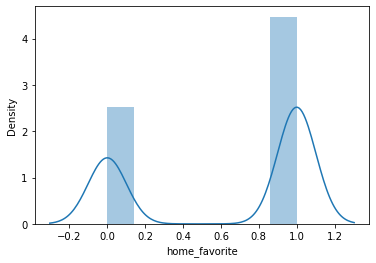

In [185]:
#Seeein the distrubution of the home favorite
sns.distplot(spread['home_favorite'])


In [36]:
# fill null values - filled with the mode
spread.hm_avg_pts_diff.fillna(-1.0, inplace=True)
spread.aw_avg_pts_diff.fillna(3.0,inplace=True)

<AxesSubplot:>

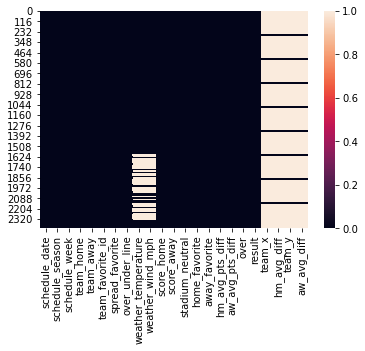

In [37]:
sns.heatmap(spread.isnull())

In [38]:
# removing all rows with null values
spread = spread.dropna(how='any',axis=1) 
spread

,schedule_date,schedule_season,schedule_week,team_home,team_away,team_favorite_id,spread_favorite,over_under_line,stadium_neutral,home_favorite,away_favorite,hm_avg_pts_diff,aw_avg_pts_diff,over,result
0,9/5/2013,2013,1,DEN,BAL,DEN,-7.5,49.5,False,1.0,0.0,-1.000000,3.000000,1.0,1
1,9/8/2013,2013,1,BUF,NE,NE,-10.5,51.5,False,0.0,1.0,-1.000000,3.000000,0.0,0
2,9/8/2013,2013,1,CAR,SEA,SEA,-3.5,45.0,False,0.0,1.0,-1.000000,3.000000,0.0,0
3,9/8/2013,2013,1,CHI,CIN,CHI,-3.0,42.0,False,1.0,0.0,-1.000000,3.000000,1.0,1
4,9/8/2013,2013,1,CLE,MIA,CLE,-2.5,40.5,False,1.0,0.0,-1.000000,3.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2418,1/23/2022,2021,Division,KC,BUF,KC,-2.5,54.0,False,1.0,0.0,6.277778,11.411765,1.0,1
2419,1/23/2022,2021,Division,TB,LAR,TB,-3.0,48.0,False,1.0,0.0,9.294118,5.055556,1.0,0
2420,1/30/2022,2021,Conference,KC,CIN,KC,-7.0,54.5,False,1.0,0.0,6.823529,4.941176,0.0,0
2421,1/30/2022,2021,Conference,LAR,SF,LAR,-3.5,46.0,False,1.0,0.0,5.176471,3.647059,0.0,1


C:\Users\metropolitanparkapts\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hm_avg_pts_diff', ylabel='Density'>

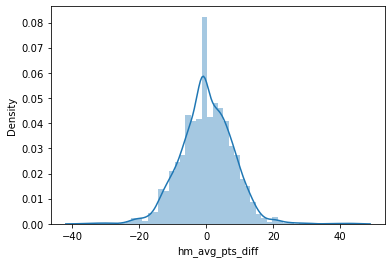

In [186]:
#it is difficult to predict the home avg point distrubuition 
sns.distplot(spread['hm_avg_pts_diff'])


In [39]:
spread = spread[['schedule_date', 'schedule_season', 'schedule_week', 'team_home',
       'team_away', 'team_favorite_id', 'spread_favorite', 'over_under_line',
        'stadium_neutral', 'home_favorite',
       'away_favorite', 'hm_avg_pts_diff','aw_avg_pts_diff', 'over', 'result']]

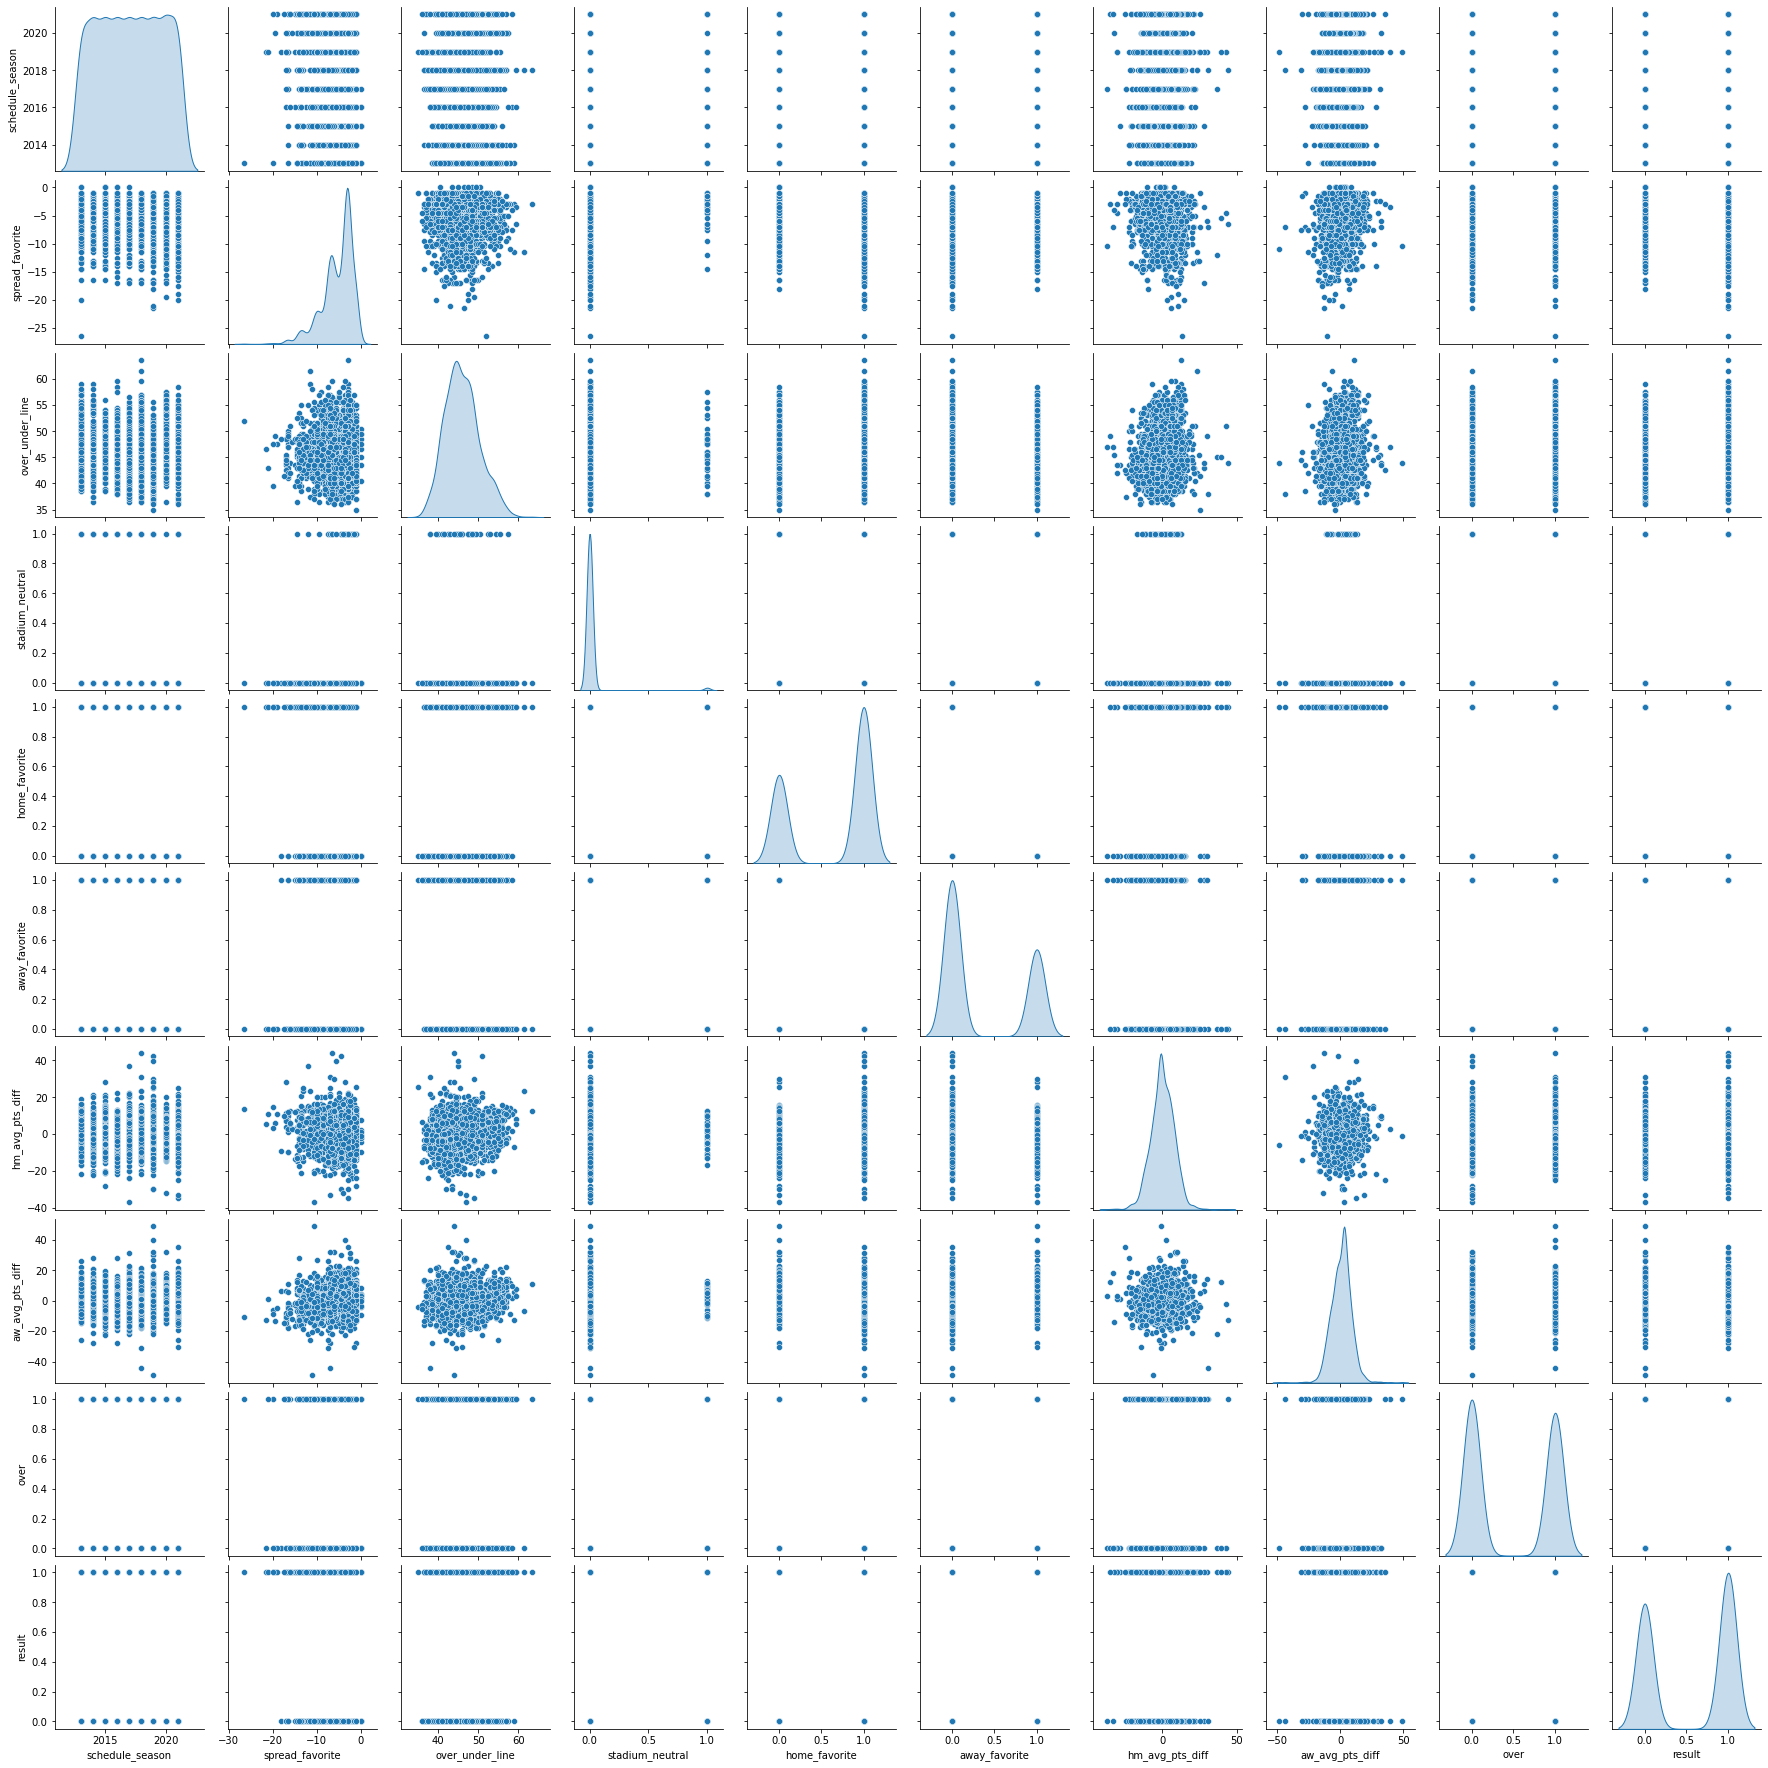

In [40]:
sns.pairplot(data=spread, diag_kind='kde')


## Modeling
The aims of this modeling process was to maximize precision while minimizing the inputs. Decreasing the complexity of the model helps to decrease colinearity and make for a better user experience of our product. We approach model development iteratively to identify the best features for our use case. Target feature - 'Over' - 

building the models was learned by https://youtu.be/L9BLLWRtnOU


### First Simple Model




In [41]:
spread.describe()

,schedule_season,spread_favorite,over_under_line,home_favorite,away_favorite,hm_avg_pts_diff,aw_avg_pts_diff,over,result
count,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000
mean,2017.032191,-5.325010,45.934379,0.638465,0.357821,0.083655,0.517345,0.477920,0.554684
std,2.596088,3.455289,4.292205,0.480544,0.479458,7.907692,7.845892,0.499615,0.497103
min,2013.000000,-26.500000,35.000000,0.000000,0.000000,-37.000000,-49.000000,0.000000,0.000000
25%,2015.000000,-7.000000,43.000000,0.000000,0.000000,-4.861905,-4.408333,0.000000,0.000000
50%,2017.000000,-4.000000,45.500000,1.000000,0.000000,-0.416667,1.000000,0.000000,1.000000
75%,2019.000000,-3.000000,48.500000,1.000000,1.000000,5.133929,5.408333,1.000000,1.000000
max,2021.000000,0.000000,63.500000,1.000000,1.000000,44.000000,49.000000,1.000000,1.000000


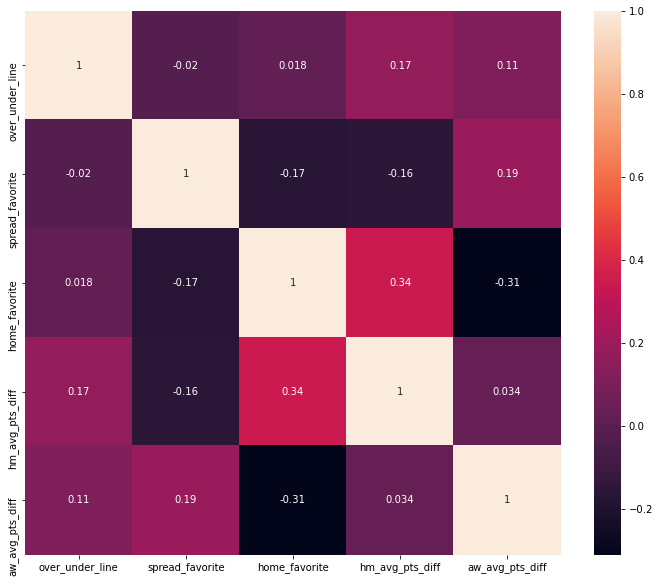

In [45]:
#Pearson Correlation Heatmap. 

plt.figure(figsize = (12,10))
corr = X_train.corr()
sns.heatmap(corr, annot=True)
plt.show()

### Baseline Model Of logistic Regression

In [42]:
#features possible for model
X = spread[['over_under_line', 'spread_favorite',
        'home_favorite', 'hm_avg_pts_diff','aw_avg_pts_diff']]

y = spread['over']

In [197]:
X_train, X_tess, y_train, y_tess = train_test_split(X, y, test_size = .3 ,random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X_tess, y_tess, test_size=0.20, random_state=42)

In [198]:
#scaling the data 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_tess)

In [47]:
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=4)
cv_scores

array([0.53537736, 0.54716981, 0.49528302, 0.53066038])

In [206]:
model.fit(X_train_scaled, y_train)

LogisticRegression()

C:\Users\metropolitanparkapts\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


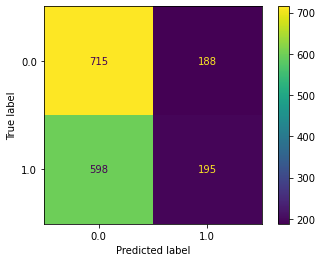

In [167]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
plot_confusion_matrix(model, X_train_scaled, y_train);

In [175]:
ols1 = OLS(y_train, X_train_scaled)
results = ols1.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   over   R-squared (uncentered):                   0.005
Model:                            OLS   Adj. R-squared (uncentered):              0.002
Method:                 Least Squares   F-statistic:                              1.559
Date:                Wed, 09 Mar 2022   Prob (F-statistic):                       0.169
Time:                        04:37:16   Log-Likelihood:                         -1758.0
No. Observations:                1696   AIC:                                      3526.
Df Residuals:                    1691   BIC:                                      3553.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0057      0.017     -0.337      0.736      -0.039       0.028
x2             0.0309      0.017      1.797      0.073      -0.003       0.065
x3            -0.0004      0.019     -0.021      0.984      -0.037       0.037
x4             0.0397      0.018      2.170      0.030       0.004       0.076
x5            -0.0169      0.018     -0.938      0.348      -0.052       0.018
==============================================================================
Omnibus:                     6317.988   Durbin-Watson:                   1.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              273.457
Skew:                           0.126   Prob(JB):                     4.17e-60
Kurtosis:                       1.049   Cond. No.                         1.77
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [207]:
#Metrics to evaluate your model 
y_hat = model.predict(X_test_scaled)

model_accuracy = accuracy_score(y_tess, y_hat) 
model_recall = recall_score(y_tess, y_hat)
model_precision = precision_score(y_tess, y_hat) 
model_f1 = f1_score(y_tess, y_hat)

In [210]:
model_f1, model_accuracy, model_recall, model_precision

(0.5192582025677603,
 0.5364511691884457,
 0.4986301369863014,
 0.5416666666666666)

### Decision Tree

C:\Users\metropolitanparkapts\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


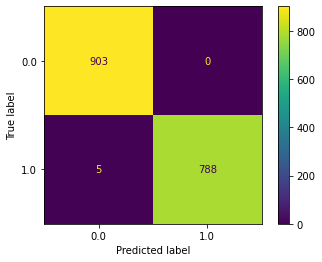

In [50]:
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)
plot_confusion_matrix(dt, X_train_scaled, y_train);

In [51]:
cv_scores = cross_val_score(dt, X_train_scaled, y_train, cv=4)
cv_scores

array([0.5495283 , 0.53773585, 0.48113208, 0.51415094])

In [52]:
y_hat = dt.predict(X_train_scaled)
dt.score(X_test_scaled, y_test)

0.5240715268225584

In [53]:
r2_score(y_test, y_hat), mean_absolute_error(y_test, y_hat), np.sqrt(mean_squared_error(y_test, y_hat))

(-0.903746310451828, 0.4759284731774415, 0.6898756940039572)

### Random Forrest Classifier 

C:\Users\metropolitanparkapts\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


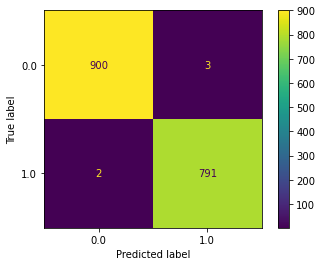

In [54]:
rfc =RandomForestClassifier(random_state = 42)
rfc.fit(X_train_scaled, y_train)
plot_confusion_matrix(rfc, X_train_scaled, y_train);

In [55]:
cv_scores = cross_val_score(rfc, X_train_scaled, y_train, cv=4)
cv_scores

array([0.54245283, 0.52122642, 0.53773585, 0.54716981])

In [56]:
y_hat2 = rfc.predict(X_test_scaled)
rfc.score(X_test_scaled, y_test)

0.4718019257221458

In [57]:
r2_score(y_test, y_hat2), mean_absolute_error(y_test, y_hat2), np.sqrt(mean_squared_error(y_test, y_hat2))

(-1.112828275183532, 0.5281980742778541, 0.7267723675800106)

### Gradient Boost 

C:\Users\metropolitanparkapts\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


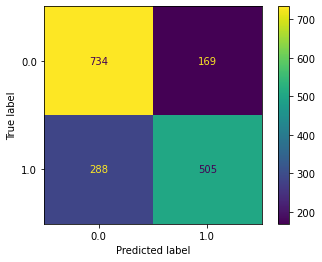

In [58]:
gb = GradientBoostingClassifier()
gb.fit(X_train_scaled, y_train)
plot_confusion_matrix(gb, X_train_scaled, y_train);

In [59]:
cv_scores = cross_val_score(gb, X_train_scaled, y_train, cv=4)
cv_scores

array([0.53773585, 0.49056604, 0.51886792, 0.5259434 ])

In [60]:
y_hat3 = gb.predict(X_test_scaled)
gb.score(X_test_scaled, y_test)

0.4896836313617607

In [61]:
r2_score(y_test, y_hat3), mean_absolute_error(y_test, y_hat3), np.sqrt(mean_squared_error(y_test, y_hat3))

(-1.0413002346174225, 0.5103163686382394, 0.7143643108654291)

# Adding a little bit more features/ Tuning Hyper Parameters 

In [62]:
def finalspread(home, away):
    return home - away

spread['final_spread'] = finalspread(spread['hm_avg_pts_diff'], spread['aw_avg_pts_diff'])
spread.reset_index(drop = True, inplace = True)

I wanted to learn more about cross validation, so I googled "" and found [TEXT](source.url)

In [63]:
Xr = spread[['over_under_line', 'spread_favorite',
        'home_favorite', 'hm_avg_pts_diff','aw_avg_pts_diff','final_spread']]

yr = spread['over']

In [64]:
from sklearn.preprocessing import RobustScaler

In [65]:
#Robust Scaler for this as some of the outliers are a bit extreme 
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size = .25 ,random_state=32)
R_scaler = RobustScaler()
X_train_scaled_R = R_scaler.fit_transform(Xr_train)
X_test_scaled_R = R_scaler.transform(Xr_test)

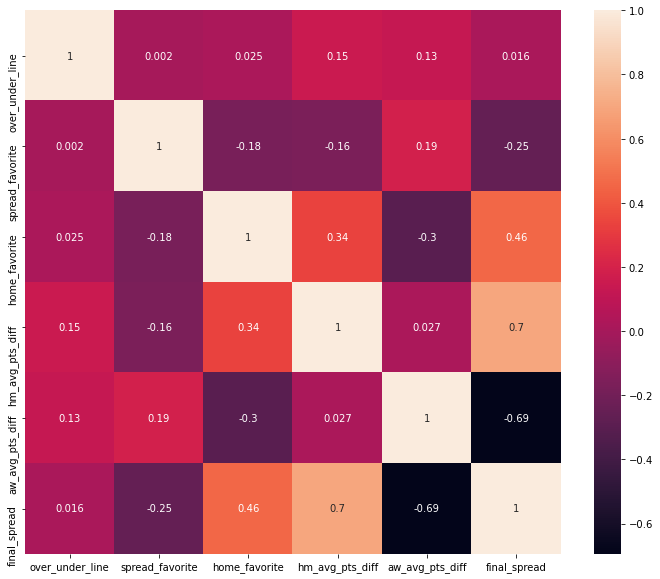

In [66]:
plt.figure(figsize = (12,10))
corr = Xr.corr()
sns.heatmap(corr, annot=True)
plt.show()

## Baseline Improvemnt? 

C:\Users\metropolitanparkapts\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


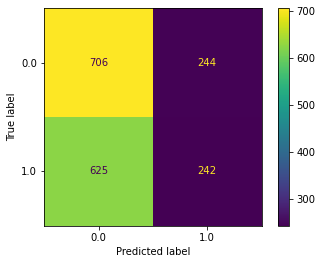

In [67]:
model_2 = LogisticRegression(penalty='none', max_iter= 300)
model_2.fit(X_train_scaled_R, yr_train)
plot_confusion_matrix(model_2, X_train_scaled_R, yr_train);

In [68]:
cv_scores = cross_val_score(model_2, X_train_scaled_R, yr_train, cv=4)
cv_scores

array([0.51648352, 0.53964758, 0.49559471, 0.5154185 ])

In [69]:
yr_pred = model_2.predict(X_test_scaled_R)
model_2.score(X_test_scaled_R, yr_test)

0.5016501650165016

In [70]:
r2_score(yr_test, yr_pred), mean_absolute_error(yr_test, yr_pred), np.sqrt(mean_squared_error(yr_test, yr_pred))

(-0.9965308460153821, 0.49834983498349833, 0.7059389739796906)

### Decision Tree 

C:\Users\metropolitanparkapts\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


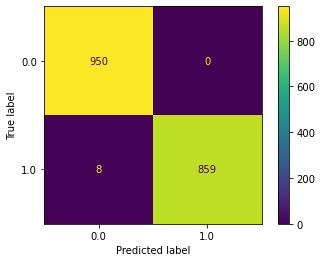

In [71]:
dt2 = DecisionTreeClassifier(splitter='random')
dt2.fit(X_train_scaled_R, yr_train)
plot_confusion_matrix(dt2, X_train_scaled_R, yr_train);

In [72]:
cv_scores = cross_val_score(dt2, X_train_scaled_R, yr_train, cv=4)
cv_scores

array([0.52747253, 0.49559471, 0.53303965, 0.51982379])

In [73]:
yr_pred2 = dt2.predict(X_test_scaled_R)
dt2.score(X_test_scaled_R, yr_test)

0.49504950495049505

In [74]:
r2_score(yr_test, yr_pred2), mean_absolute_error(yr_test, yr_pred2), np.sqrt(mean_squared_error(yr_test, yr_pred2))

(-1.0229749631811487, 0.504950495049505, 0.7105986877623016)

In [94]:
#Lets change the variables to see if it gives us a better fit

XL = spread[['over_under_line', 'spread_favorite',
        'home_favorite', 'hm_avg_pts_diff']]

yL = spread['over']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3 ,random_state=42)


## Parameter Tuning

In [75]:
from scipy.stats import poisson

In [76]:
spread.tail(30)

,schedule_date,schedule_season,schedule_week,team_home,team_away,team_favorite_id,spread_favorite,over_under_line,stadium_neutral,home_favorite,away_favorite,hm_avg_pts_diff,aw_avg_pts_diff,over,result,final_spread
2393,1/3/2022,2021,17,PIT,CLE,PIT,-2.0,42.0,False,1.0,0.0,-6.875000,-6.714286,0.0,1,-0.160714
2394,1/8/2022,2021,18,DEN,KC,KC,-11.5,44.5,False,0.0,1.0,-0.375000,15.250000,1.0,0,-15.625000
2395,1/8/2022,2021,18,PHI,DAL,DAL,-6.0,46.5,False,0.0,1.0,12.625000,10.666667,1.0,0,1.958333
2396,1/9/2022,2021,18,ARI,SEA,ARI,-5.0,48.5,False,1.0,0.0,-0.750000,2.333333,1.0,0,-3.083333
2397,1/9/2022,2021,18,ATL,NO,NO,-4.5,40.0,False,0.0,1.0,-13.000000,0.888889,1.0,0,-13.888889
2398,1/9/2022,2021,18,BAL,PIT,BAL,-3.0,41.0,False,1.0,0.0,-3.777778,-4.777778,0.0,0,1.000000
2399,1/9/2022,2021,18,BUF,NYJ,BUF,-16.0,42.0,False,1.0,0.0,5.888889,-8.333333,0.0,1,14.222222
2400,1/9/2022,2021,18,CLE,CIN,CLE,-6.5,38.0,False,1.0,0.0,-7.375000,7.375000,0.0,1,-14.750000
2401,1/9/2022,2021,18,DET,GB,GB,-4.0,45.0,False,0.0,1.0,-5.222222,4.000000,1.0,1,-9.222222
2402,1/9/2022,2021,18,HOU,TEN,TEN,-10.5,43.0,False,0.0,1.0,-2.875000,-0.875000,1.0,0,-2.000000


In [77]:
pd.set_option('display.max_rows',300,)

In [78]:
total_wins = spread.groupby(['team_home'],as_index=False)['result'].sum()

In [138]:
total_over = spread.groupby(['team_home'],as_index=False)['over'].agg('sum')

In [80]:
total_points_home =spread.groupby(['team_home'],as_index=False)['hm_avg_pts_diff'].sum()

In [81]:
total_points_away = total_points =spread.groupby(['team_home'],as_index=False)['aw_avg_pts_diff'].sum()

In [187]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(False)

In [190]:
from  sklearn.model_selection import GridSearchCV
#Random Forrest 

rfc_cv = GridSearchCV(estimator=rfc, cv= 5)
rfc_cv.fit(X_train, y_train)

TypeError: __init__() missing 1 required positional argument: 'param_grid'